<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Ensemble/Gradient_Boosting_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

In [2]:
test=pd.read_csv("https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/titanic-test.csv")
train=pd.read_csv("https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/titanic-train.csv")

In [3]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [4]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [7]:
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [8]:
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [9]:
# ‘Pclass’ is a categorical feature so we convert its values to strings
train['Pclass'] = train['Pclass'].apply(str)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
# drop the name col
train.drop(['Name'], axis=1, inplace=True)

In [12]:
# these need to be converted to numbers
for col in train.dtypes[train.dtypes == 'object'].index:
    print(col)

Pclass
Sex
Ticket
Cabin
Embarked


In [13]:
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
   for_dummy = train.pop(col)
   train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [14]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112379,Ticket_113028,Ticket_113043,Ticket_113050,Ticket_113051,Ticket_113055,Ticket_113056,Ticket_113059,Ticket_113501,Ticket_113503,Ticket_113505,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
labels = train.pop('Survived')

In [16]:
train.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112379,Ticket_113028,Ticket_113043,Ticket_113050,Ticket_113051,Ticket_113055,Ticket_113056,Ticket_113059,Ticket_113501,Ticket_113503,Ticket_113505,Ticket_113509,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 841), (223, 841), (668,), (223,))

In [21]:
model = GradientBoostingClassifier()
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8065646081992733

In [25]:
print('Accuracy : ', accuracy_score(y_pred, y_test))

Accuracy :  0.8295964125560538


#### train with Gradient Boosting algorithm

Learning rate:  0.05
Accuracy score (training): 0.856
Accuracy score (test)    : 0.825
Learning rate:  0.1
Accuracy score (training): 0.868
Accuracy score (test)    : 0.821
Learning rate:  0.25
Accuracy score (training): 0.994
Accuracy score (test)    : 0.839
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (test)    : 0.848
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (test)    : 0.843
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (test)    : 0.852


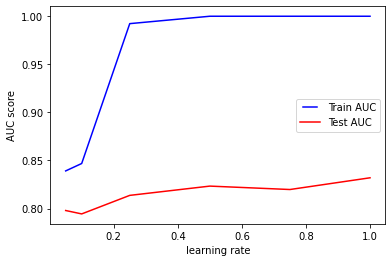

In [29]:
# compute the accuracy scores on train and validation sets when training with different 
# learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

train_results = []
test_results  = []

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, 
                                    random_state  = 0)
    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(learning_rates, train_results, 'b', label ="Train AUC")
line2, = plt.plot(learning_rates, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()    


 We see that using a high learning rate results in overfitting. For this data, a learning rate of 0.1 is optimal.

#### N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

# Estimators             :  1
Accuracy score (training): 0.611
Accuracy score (test)    : 0.632
# Estimators             :  2
Accuracy score (training): 0.633
Accuracy score (test)    : 0.646
# Estimators             :  4
Accuracy score (training): 0.807
Accuracy score (test)    : 0.825
# Estimators             :  8
Accuracy score (training): 0.834
Accuracy score (test)    : 0.825
# Estimators             :  16
Accuracy score (training): 0.847
Accuracy score (test)    : 0.825
# Estimators             :  32
Accuracy score (training): 0.861
Accuracy score (test)    : 0.816
# Estimators             :  64
Accuracy score (training): 0.861
Accuracy score (test)    : 0.816
# Estimators             :  100
Accuracy score (training): 0.868
Accuracy score (test)    : 0.821
# Estimators             :  200
Accuracy score (training): 0.984
Accuracy score (test)    : 0.834


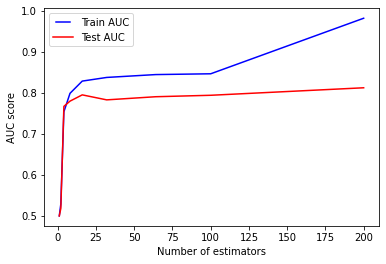

In [30]:
# compute the accuracy scores on train and validation sets when training with different 
# estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results  = []

for estimators in n_estimators:
    gb = GradientBoostingClassifier(n_estimators  = estimators, 
                                    learning_rate = 0.1,
                                    random_state  = 0)

    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("# Estimators             : ", estimators)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(n_estimators, train_results, 'b', label ="Train AUC")
line2, = plt.plot(n_estimators, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Number of estimators')
plt.show()    


> Increasing the number of estimators may result in overfitting also. In our case, using 32 trees is optimal.

#### max_depth
max_depth. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

# Estimators             :  200
Accuracy score (training): 0.787
Accuracy score (test)    : 0.789
# Estimators             :  200
Accuracy score (training): 0.832
Accuracy score (test)    : 0.816
# Estimators             :  200
Accuracy score (training): 0.861
Accuracy score (test)    : 0.816
# Estimators             :  200
Accuracy score (training): 0.876
Accuracy score (test)    : 0.830
# Estimators             :  200
Accuracy score (training): 0.931
Accuracy score (test)    : 0.812
# Estimators             :  200
Accuracy score (training): 0.936
Accuracy score (test)    : 0.834
# Estimators             :  200
Accuracy score (training): 0.960
Accuracy score (test)    : 0.821
# Estimators             :  200
Accuracy score (training): 0.978
Accuracy score (test)    : 0.821
# Estimators             :  200
Accuracy score (training): 0.997
Accuracy score (test)    : 0.825
# Estimators             :  200
Accuracy score (training): 1.000
Accuracy score (test)    : 0.825
# Estimators        

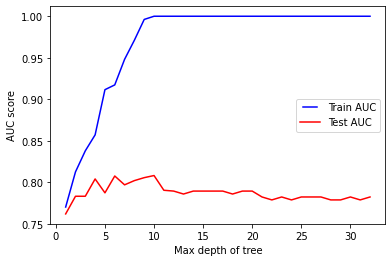

In [34]:
# compute the accuracy scores on train and validation sets when training with different 
# estimators

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results  = []

for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators  = 32, 
                                    learning_rate = 0.1,
                                    max_depth     = max_depth,
                                    random_state  = 0)

    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("# Estimators             : ", estimators)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(max_depths, train_results, 'b', label ="Train AUC")
line2, = plt.plot(max_depths, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max depth of tree')
plt.show()  

> We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

#### Confusion matrix and classification report validation set

In [37]:
gb = GradientBoostingClassifier(n_estimators=25, 
                                learning_rate = 0.1, 
                                max_depth = 10, 
                                random_state = 0)

gb.fit(X_train, y_train)

predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

print("Accuracy")
print(accuracy_score (y_test, predictions))

Confusion Matrix:
[[123  18]
 [ 21  61]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.77      0.74      0.76        82

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223

Accuracy
0.8251121076233184


#Now for regressor

In [43]:
# #############################################################################
# Load data
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [44]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 
          'max_depth': 4, 
          'min_samples_split': 2,
          'learning_rate': 0.01, 
          'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 6.5789


Text(0, 0.5, 'Deviance')

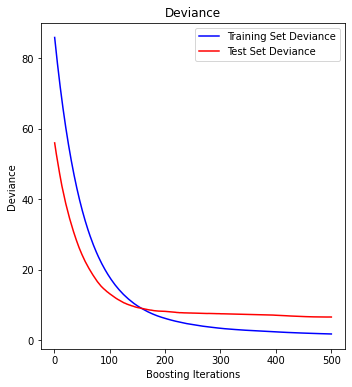

In [45]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')

plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

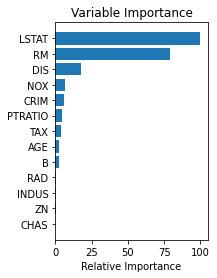

In [46]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()